### Multilayer perceptron

In [2]:
%tensorflow_version 1.x

In [3]:
import tensorflow as tf
print(tf.version.VERSION)

1.15.2


In [30]:
import pandas as pd
import numpy as np

In [5]:
# SMOTE balancing technique is applied
from imblearn.over_sampling import SMOTE
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
#import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Read the dataset
data = pd.read_csv("/content/drive/MyDrive/data_all_dfeatures.csv")

In [97]:
# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)

unique, count = np.unique(y_train, return_counts=True)
y_train_class_counts = {k:v for k, v in zip(unique, count)}
y_train_class_counts



{0: 70421, 1: 9051}

In [98]:
#SMOTE
# sampling_strategy = [0.15, 0.2, 0.25, 0.5, 0.75, 1.0 ]
oversample = SMOTE(sampling_strategy=1.0, random_state=12)
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [99]:
unique, count = np.unique(y_train, return_counts=True)
y_train_class_counts = {k:v for k, v in zip(unique, count)}
y_train_class_counts

{0: 70421, 1: 70421}

In [100]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140842, 130), (19868, 130), (140842,), (19868,))

In [101]:
from tensorflow.keras.layers import Dense,Input,Activation,Dropout
from tensorflow.keras import Model
from tensorflow.keras import Sequential
import random as rn
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import datetime

In [17]:
tf.__version__

'1.15.2'

In [18]:
num_classes = 2

In [19]:
from tensorflow.keras.layers import PReLU

In [104]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1, name='Adam')
def create_model4():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    
    model = Sequential([
        Input(shape=(130,), name='input_layer'),
        Dense(64, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        Dropout(rate=0.15, name='drop_out1'),
        Dense(64, kernel_initializer=initializer, name='dense_layer2'),
        PReLU(),
        Dropout(rate=0.5, name='drop_out2'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [105]:
model4 = create_model4()
model4.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model4.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 64)                8384      
_________________________________________________________________
p_re_lu_22 (PReLU)           (None, 64)                64        
_________________________________________________________________
drop_out1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_layer2 (Dense)         (None, 64)                4160      
_________________________________________________________________
p_re_lu_23 (PReLU)           (None, 64)                64        
_________________________________________________________________
drop_out2 (Dropout)          (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)               

In [106]:
model4.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test),
           batch_size=16)

Train on 140842 samples, validate on 19868 samples
Epoch 1/5
140842/140842 [==============================] - 24s 171us/sample - loss: 0.5000 - acc: 0.5000 - val_loss: 0.1139 - val_acc: 0.8861
Epoch 2/5
140842/140842 [==============================] - 24s 169us/sample - loss: 0.5015 - acc: 0.4985 - val_loss: 0.8861 - val_acc: 0.1139
Epoch 3/5
140842/140842 [==============================] - 24s 171us/sample - loss: 0.5000 - acc: 0.5000 - val_loss: 0.8861 - val_acc: 0.1139
Epoch 4/5
140842/140842 [==============================] - 24s 169us/sample - loss: 0.5001 - acc: 0.4999 - val_loss: 0.8861 - val_acc: 0.1139
Epoch 5/5
140842/140842 [==============================] - 23s 167us/sample - loss: 0.5000 - acc: 0.5000 - val_loss: 0.8861 - val_acc: 0.1139


In [107]:
# file_path = '/mnt/disks/user/project'
model4.save('/content/drive/MyDrive/modelling_save/sm/mlp_all_dfeatures_smote')


In [108]:
# serialize model to JSON
model_json = model4.to_json()
with open("/content/drive/MyDrive/modelling_save/sm/mlp_json_all_dfeatures_smote.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model4.save_weights("/content/drive/MyDrive/modelling_save/sm/mlp_weights_alldfeatures_smote.h5")
print("Saved model to disk")

Saved model to disk


In [94]:
model4.history.history

{'acc': [0.5677075, 0.56852704, 0.5694764, 0.56916, 0.57103443],
 'loss': [0.4322929768286977,
  0.43147299785476884,
  0.43052317275946494,
  0.43084003490007794,
  0.4289655620227086],
 'val_acc': [0.88609827, 0.88609827, 0.88609827, 0.88609827, 0.88609827],
 'val_loss': [0.11390175156929806,
  0.11390175156179798,
  0.11390175156479801,
  0.11390175156929806,
  0.11390175156929806]}

In [109]:
loss = model4.history.history['loss']
val_loss = model4.history.history['val_loss']
accuracy = model4.history.history['acc']
val_accuracy = model4.history.history['val_acc']
loss, val_loss, accuracy, val_accuracy

([0.5000135006928437,
  0.5015123326497642,
  0.5000426009287002,
  0.5000852018590933,
  0.49998579969085644],
 [0.11390175156029797,
  0.8860982484517022,
  0.8860982484397021,
  0.8860982484277019,
  0.8860982484397021],
 [0.4999787, 0.49848768, 0.4999574, 0.4999148, 0.5000142],
 [0.88609827, 0.11390175, 0.11390175, 0.11390175, 0.11390175])

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [110]:

# predict probabilities for test set
yhat_probs = model4.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model4.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.113902
Precision: 0.113902
Recall: 1.000000
F1 score: 0.204510
ROC AUC: 0.500000
[[    0 17605]
 [    0  2263]]


In [ ]:
from matplotlib import pyplot

Train: 0.500, Test: 0.886


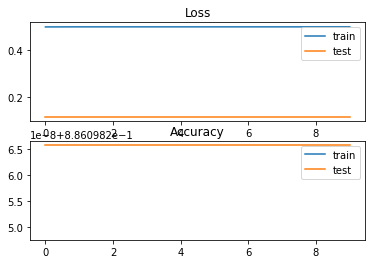

In [ ]:
# evaluate the model
_, train_acc = model4.evaluate(X_train, y_train, verbose=0)
_, test_acc = model4.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(loss, label='train')
pyplot.plot(val_loss, label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(accuracy, label='train')
pyplot.plot(val_accuracy, label='test')
pyplot.legend()
pyplot.show()